
##  Iowa House Price 




In [2]:
''' Import libraries '''

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sns   
from sklearn.linear_model import LinearRegression 

pd.set_option('display.max_columns', 90)   
pd.set_option('display.max_rows', 90)

%matplotlib inline
#%config InlineBackend.figure_format = 'svg'   



In [4]:
from read_path_module import read_data_relative_path

df_train = read_data_relative_path(relative_dataset_path = './data/kaggle/train.csv',
                        data_type='csv'
                       )

df_train.head(15)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [5]:

# df_train = pd.read_csv('house_train.csv')
# #df_test = pd.read_csv('house_test.csv')  

# df_train.head(15)


In [6]:
''' Shape of the datasets '''    

print('Training set:', df_train.shape)  
#print('Test set:', df_test.shape)  

Training set: (1460, 81)


In [4]:

df_train.describe().transpose() 


,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


In [5]:
''' Information on df_train '''   

df_train.info()  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:

df_train.columns 


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [7]:
''' correlation heatmap of numerical features '''

df_train.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3)   




###  2.  Create a copy of df_train to isolate on numerical features with high correlations (> 0.5)          



In [8]:
''' Create a copy data frame with corr > 0.5 '''

df_1 = df_train[['OverallQual', 'YearBuilt', 'YearRemodAdd', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 
                'TotRmsAbvGrd', 'GarageCars', 'GarageArea', 'SalePrice']]          

In [9]:
df_1

,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
0,7,2003,2003,856,856,1710,2,8,2,548,208500
1,6,1976,1976,1262,1262,1262,2,6,2,460,181500
2,7,2001,2002,920,920,1786,2,6,2,608,223500
3,7,1915,1970,756,961,1717,1,7,3,642,140000
4,8,2000,2000,1145,1145,2198,2,9,3,836,250000
...,...,...,...,...,...,...,...,...,...,...,...
1455,6,1999,2000,953,953,1647,2,7,2,460,175000
1456,6,1978,1988,1542,2073,2073,2,7,2,500,210000
1457,7,1941,2006,1152,1188,2340,2,9,1,252,266500
1458,5,1950,1996,1078,1078,1078,1,5,1,240,142125


In [10]:
''' df_1 correlation heatmap '''

df_1.corr().style.background_gradient(cmap = 'coolwarm').set_precision(3) 


,OverallQual,YearBuilt,YearRemodAdd,TotalBsmtSF,1stFlrSF,GrLivArea,FullBath,TotRmsAbvGrd,GarageCars,GarageArea,SalePrice
OverallQual,1.000,0.572,0.551,0.538,0.476,0.593,0.551,0.427,0.601,0.562,0.791
YearBuilt,0.572,1.000,0.593,0.391,0.282,0.199,0.468,0.096,0.538,0.479,0.523
YearRemodAdd,0.551,0.593,1.000,0.291,0.240,0.287,0.439,0.192,0.421,0.372,0.507
TotalBsmtSF,0.538,0.391,0.291,1.000,0.820,0.455,0.324,0.286,0.435,0.487,0.614
1stFlrSF,0.476,0.282,0.240,0.820,1.000,0.566,0.381,0.410,0.439,0.490,0.606
GrLivArea,0.593,0.199,0.287,0.455,0.566,1.000,0.630,0.825,0.467,0.469,0.709
FullBath,0.551,0.468,0.439,0.324,0.381,0.630,1.000,0.555,0.470,0.406,0.561
TotRmsAbvGrd,0.427,0.096,0.192,0.286,0.410,0.825,0.555,1.000,0.362,0.338,0.534
GarageCars,0.601,0.538,0.421,0.435,0.439,0.467,0.470,0.362,1.000,0.882,0.640
GarageArea,0.562,0.479,0.372,0.487,0.490,0.469,0.406,0.338,0.882,1.000,0.623


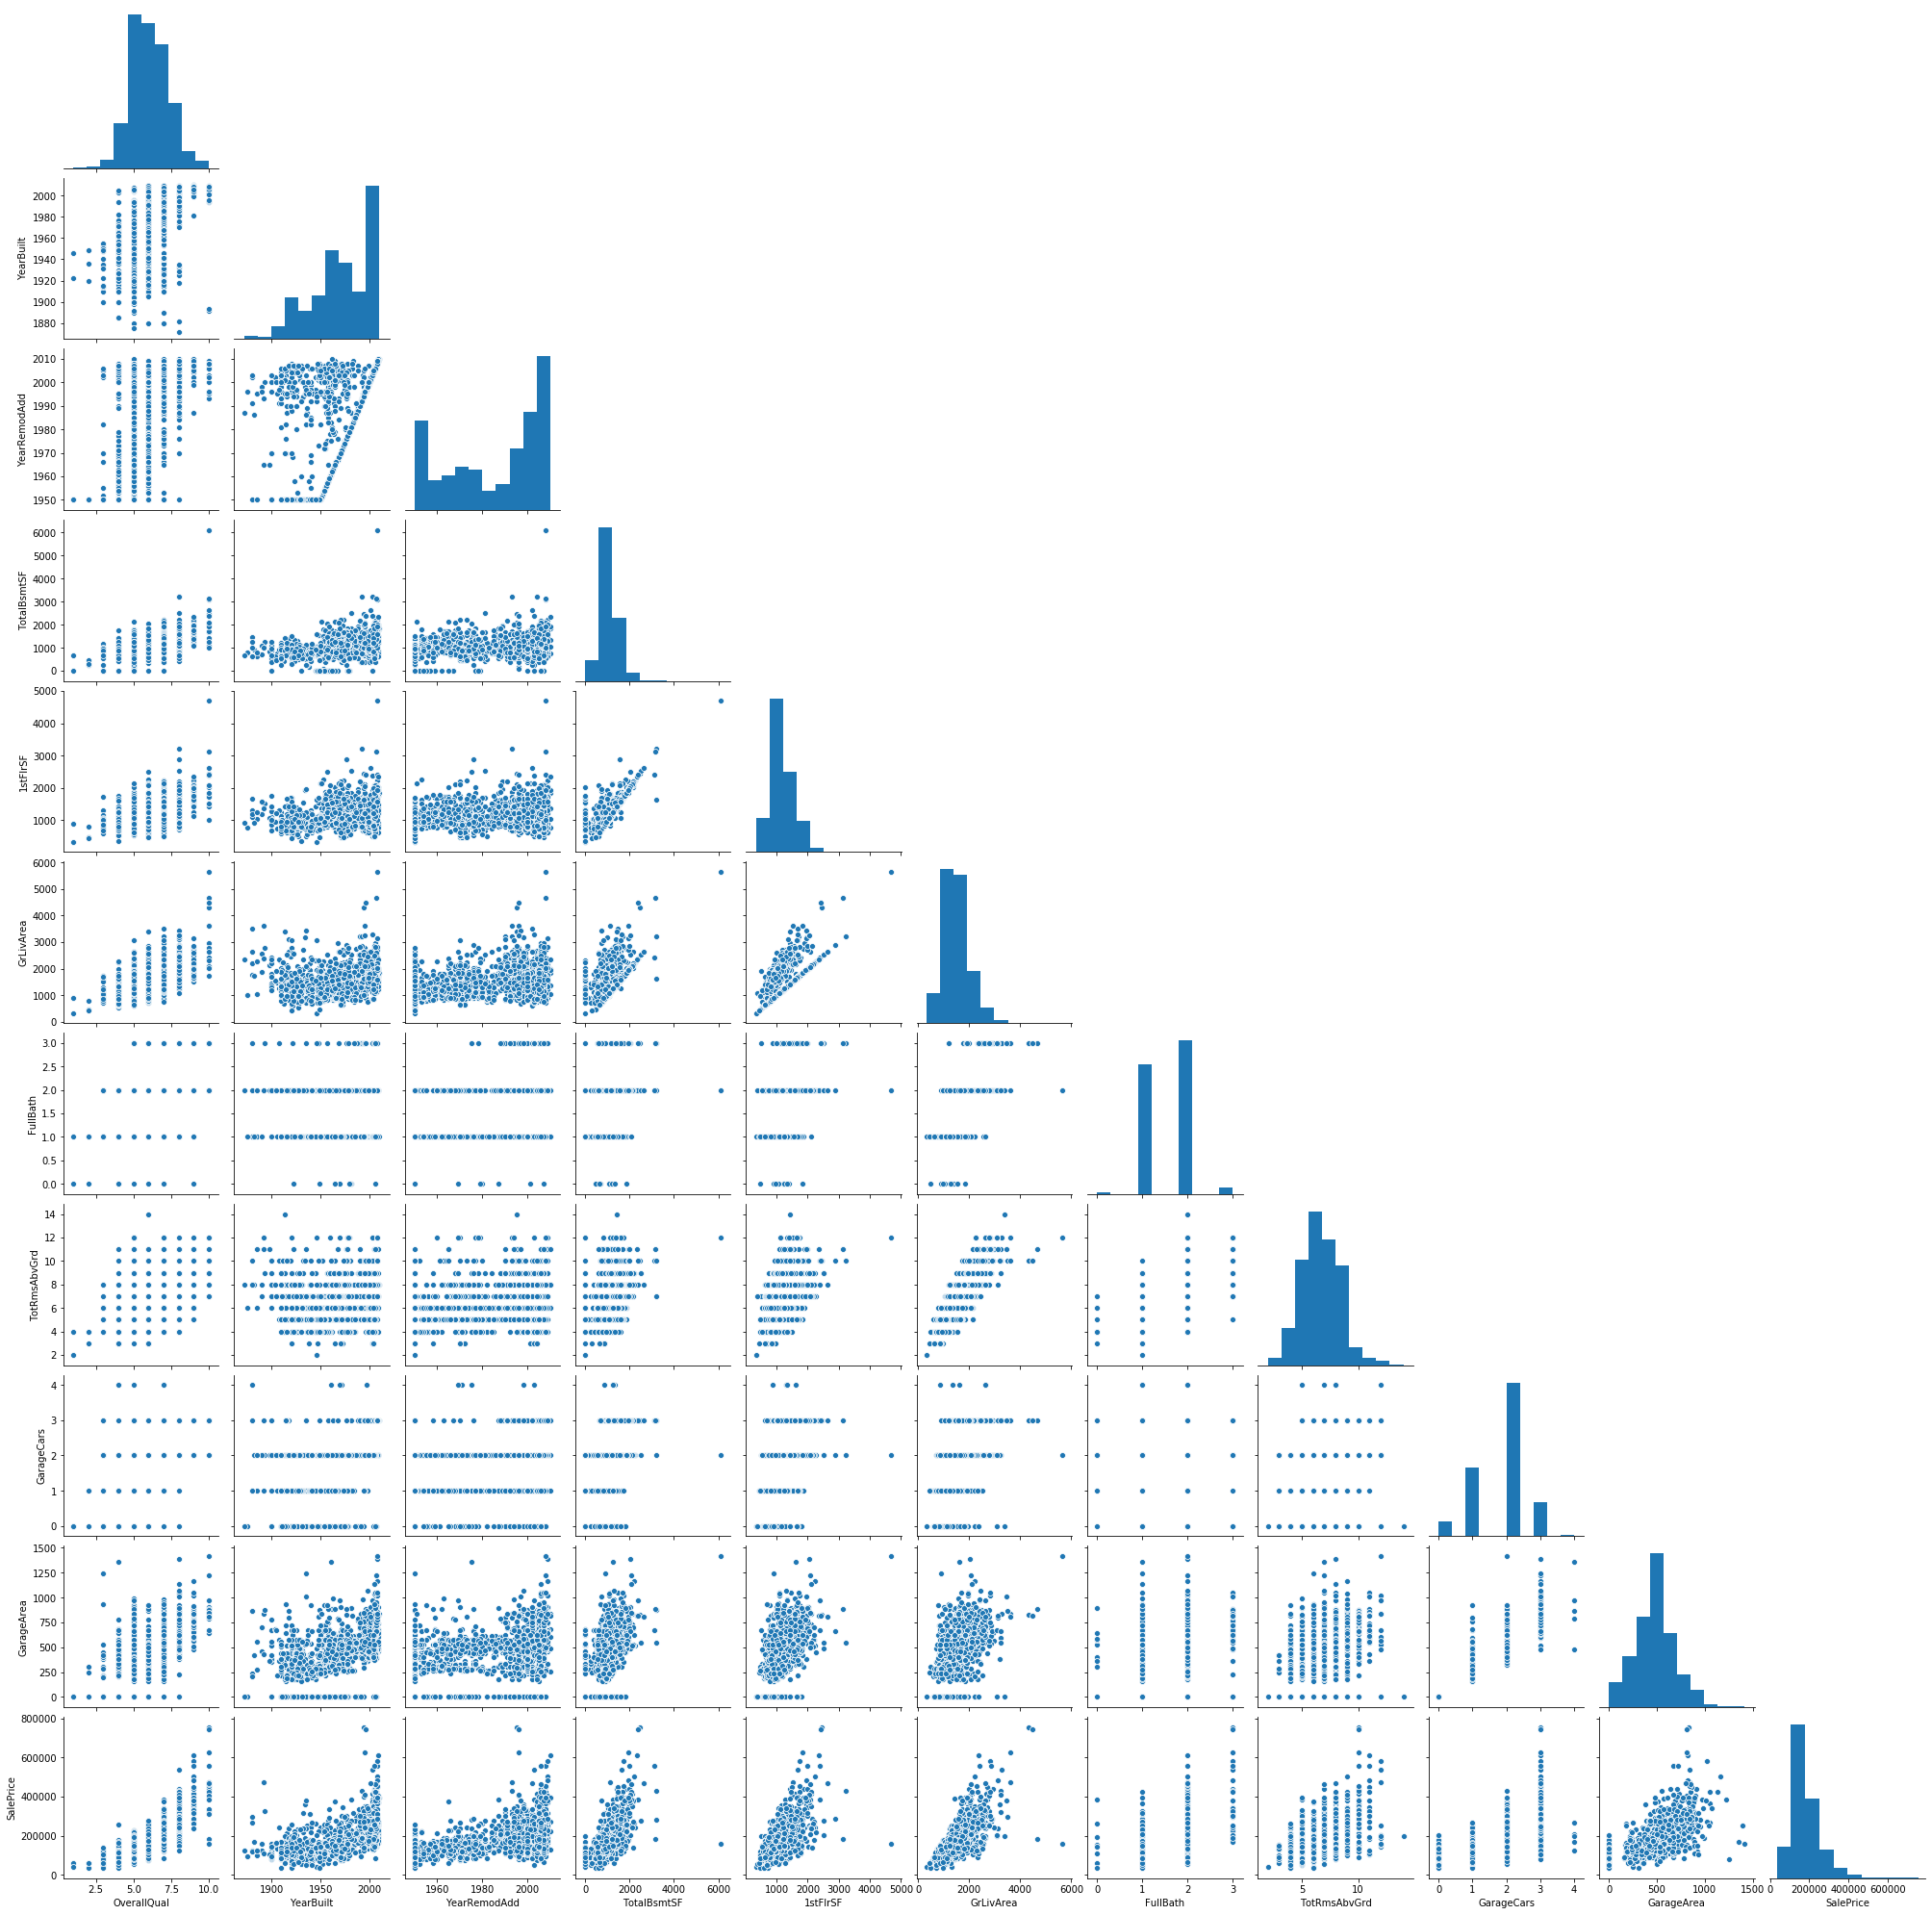

In [11]:
''' pair plot of df_1 via Seaborn '''   

sns.pairplot(df_1, corner = True) 

plt.show()     


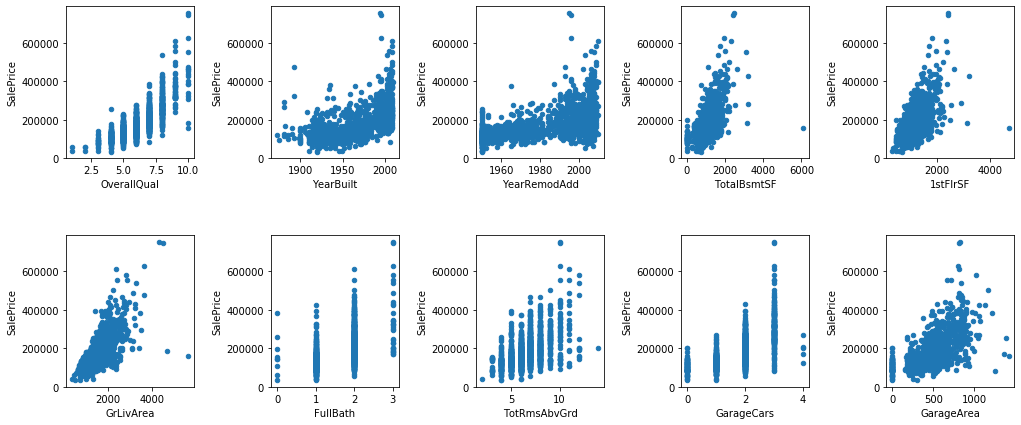

In [12]:
''' Scatter plots of high correlation features with SalePrice ''' 

fig, axes = plt.subplots(nrows = 2, ncols = 5, figsize = (17, 7))
df_1.plot(ax = axes[0, 0], kind = 'scatter', x = 'OverallQual', y = 'SalePrice') 
df_1.plot(ax = axes[0, 1], kind = 'scatter', x = 'YearBuilt', y = 'SalePrice') 
df_1.plot(ax = axes[0, 2], kind = 'scatter', x = 'YearRemodAdd', y = 'SalePrice') 
df_1.plot(ax = axes[0, 3], kind = 'scatter', x = 'TotalBsmtSF', y = 'SalePrice') 
df_1.plot(ax = axes[0, 4], kind = 'scatter', x = '1stFlrSF', y = 'SalePrice') 
df_1.plot(ax = axes[1, 0], kind = 'scatter', x = 'GrLivArea', y = 'SalePrice') 
df_1.plot(ax = axes[1, 1], kind = 'scatter', x = 'FullBath', y = 'SalePrice') 
df_1.plot(ax = axes[1, 2], kind = 'scatter', x = 'TotRmsAbvGrd', y = 'SalePrice') 
df_1.plot(ax = axes[1, 3], kind = 'scatter', x = 'GarageCars', y = 'SalePrice') 
df_1.plot(ax = axes[1, 4], kind = 'scatter', x = 'GarageArea', y = 'SalePrice')   

plt.subplots_adjust(wspace = 0.6, hspace = 0.5) 
plt.show()

###  3.  Distribution of the target (SalePrice)        

[]

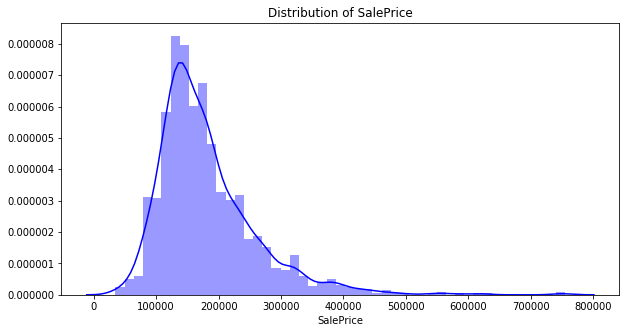

In [13]:
''' histogram of the target/label SalePrice  '''

plt.figure(figsize = (10, 5))  
sns.distplot(df_train['SalePrice'], color = 'blue')  
plt.title('Distribution of SalePrice')   

plt.plot()   



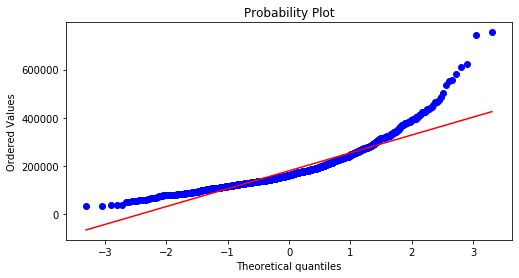

In [14]:
''' normal probability distribution plot - QQ plot'''

from scipy import stats 

fig = plt.figure(figsize = (8, 4))     
res = stats.probplot(df_train['SalePrice'], plot = plt)  



###  4.  Categorical features: Neighborhood       

In [15]:
''' Value count of Neighborhood '''   

df_train['Neighborhood'].value_counts(ascending = True) 


Blueste      2
NPkVill      9
Veenker     11
BrDale      16
Blmngtn     17
MeadowV     17
SWISU       25
StoneBr     25
ClearCr     28
IDOTRR      37
Timber      38
NoRidge     41
Mitchel     49
Crawfor     51
BrkSide     58
SawyerW     59
NWAmes      73
Sawyer      74
NridgHt     77
Gilbert     79
Somerst     86
Edwards    100
OldTown    113
CollgCr    150
NAmes      225
Name: Neighborhood, dtype: int64

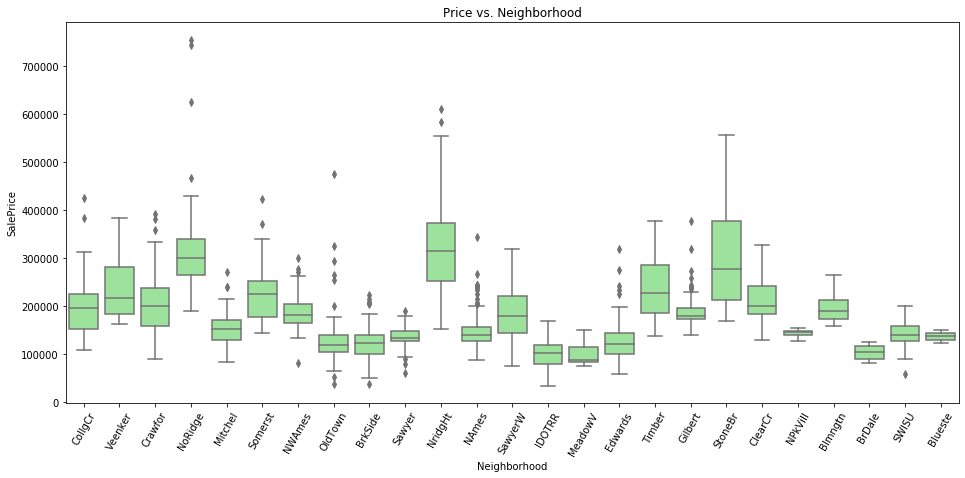

In [16]:
''' Box plot of SalePrice vs. Neighborhood (unordered) '''   

plt.figure(figsize = (16, 7)) 
 
ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', data = df_train, color = 'lightgreen') 
ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)  
plt.title('Price vs. Neighborhood')

plt.show() 


In [17]:
''' Median SalePrice of Neighborhood '''   

df_train.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending = True)   


Neighborhood
MeadowV     88000
IDOTRR     103000
BrDale     106000
OldTown    119000
Edwards    121750
BrkSide    124300
Sawyer     135000
Blueste    137500
SWISU      139500
NAmes      140000
NPkVill    146000
Mitchel    153500
SawyerW    179900
Gilbert    181000
NWAmes     182900
Blmngtn    191000
CollgCr    197200
ClearCr    200250
Crawfor    200624
Veenker    218000
Somerst    225500
Timber     228475
StoneBr    278000
NoRidge    301500
NridgHt    315000
Name: SalePrice, dtype: int64

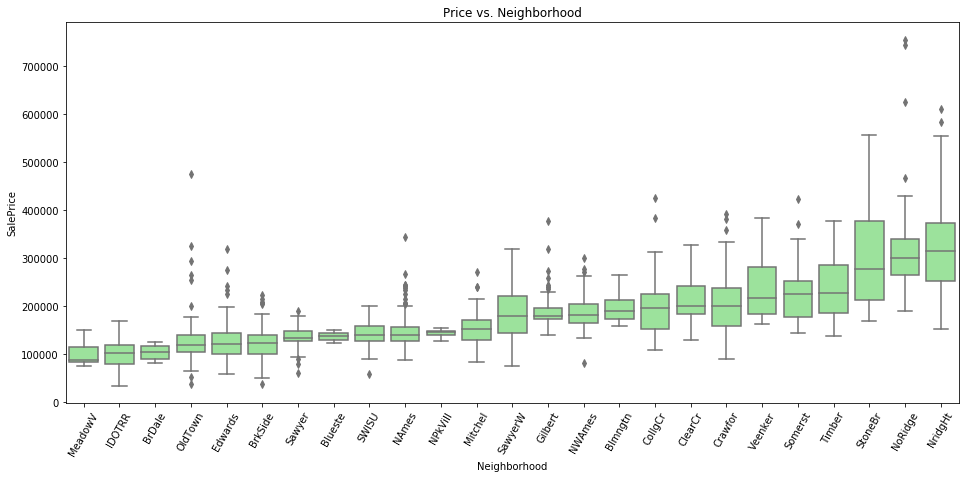

In [18]:
''' Box plot of SalePrice vs. Neighborhood (ordered) '''  

plt.figure(figsize = (16, 7)) 

ax = sns.boxplot(x = 'Neighborhood', y = 'SalePrice', 
                 data = df_train, 
                 order = ['MeadowV', 'IDOTRR', 'BrDale', 'OldTown', 'Edwards', 'BrkSide', 'Sawyer', 'Blueste', 
                          'SWISU', 'NAmes', 'NPkVill', 'Mitchel', 'SawyerW', 'Gilbert', 'NWAmes', 'Blmngtn', 
                          'CollgCr', 'ClearCr', 'Crawfor', 'Veenker', 'Somerst', 'Timber', 
                          'StoneBr', 'NoRidge', 'NridgHt'], color = 'lightgreen') 

ax.set_xticklabels(ax.get_xticklabels(), rotation = 60)  
plt.title('Price vs. Neighborhood')

plt.show() 


###  5.  Categorical features: value count    

In [19]:

# new data frame for integers and strings 
df_cat = df_train.select_dtypes(['int64', 'object'])   

for col in df_cat.columns: 
    print('-'*20 + col + '-'*20)      
    display(df_cat[col].value_counts(dropna = False).head(12))  




--------------------Id--------------------


1460    1
479     1
481     1
482     1
483     1
484     1
485     1
486     1
487     1
488     1
489     1
490     1
Name: Id, dtype: int64

--------------------MSSubClass--------------------


20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
Name: MSSubClass, dtype: int64

--------------------MSZoning--------------------


RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64

--------------------LotArea--------------------


7200     25
9600     24
6000     17
10800    14
9000     14
8400     14
1680     10
7500      9
8125      8
9100      8
6120      8
6240      8
Name: LotArea, dtype: int64

--------------------Street--------------------


Pave    1454
Grvl       6
Name: Street, dtype: int64

--------------------Alley--------------------


NaN     1369
Grvl      50
Pave      41
Name: Alley, dtype: int64

--------------------LotShape--------------------


Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64

--------------------LandContour--------------------


Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64

--------------------Utilities--------------------


AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

--------------------LotConfig--------------------


Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64

--------------------LandSlope--------------------


Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64

--------------------Neighborhood--------------------


NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Name: Neighborhood, dtype: int64

--------------------Condition1--------------------


Norm      1260
Feedr       81
Artery      48
RRAn        26
PosN        19
RRAe        11
PosA         8
RRNn         5
RRNe         2
Name: Condition1, dtype: int64

--------------------Condition2--------------------


Norm      1445
Feedr        6
PosN         2
RRNn         2
Artery       2
RRAn         1
PosA         1
RRAe         1
Name: Condition2, dtype: int64

--------------------BldgType--------------------


1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

--------------------HouseStyle--------------------


1Story    726
2Story    445
1.5Fin    154
SLvl       65
SFoyer     37
1.5Unf     14
2.5Unf     11
2.5Fin      8
Name: HouseStyle, dtype: int64

--------------------OverallQual--------------------


5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

--------------------OverallCond--------------------


5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

--------------------YearBuilt--------------------


2006    67
2005    64
2004    54
2007    49
2003    45
1976    33
1977    32
1920    30
1959    26
1999    25
1998    25
1958    24
Name: YearBuilt, dtype: int64

--------------------YearRemodAdd--------------------


1950    178
2006     97
2007     76
2005     73
2004     62
2000     55
2003     51
2002     48
2008     40
1996     36
1998     36
1995     31
Name: YearRemodAdd, dtype: int64

--------------------RoofStyle--------------------


Gable      1141
Hip         286
Flat         13
Gambrel      11
Mansard       7
Shed          2
Name: RoofStyle, dtype: int64

--------------------RoofMatl--------------------


CompShg    1434
Tar&Grv      11
WdShngl       6
WdShake       5
Membran       1
Roll          1
Metal         1
ClyTile       1
Name: RoofMatl, dtype: int64

--------------------Exterior1st--------------------


VinylSd    515
HdBoard    222
MetalSd    220
Wd Sdng    206
Plywood    108
CemntBd     61
BrkFace     50
WdShing     26
Stucco      25
AsbShng     20
BrkComm      2
Stone        2
Name: Exterior1st, dtype: int64

--------------------Exterior2nd--------------------


VinylSd    504
MetalSd    214
HdBoard    207
Wd Sdng    197
Plywood    142
CmentBd     60
Wd Shng     38
Stucco      26
BrkFace     25
AsbShng     20
ImStucc     10
Brk Cmn      7
Name: Exterior2nd, dtype: int64

--------------------MasVnrType--------------------


None       864
BrkFace    445
Stone      128
BrkCmn      15
NaN          8
Name: MasVnrType, dtype: int64

--------------------ExterQual--------------------


TA    906
Gd    488
Ex     52
Fa     14
Name: ExterQual, dtype: int64

--------------------ExterCond--------------------


TA    1282
Gd     146
Fa      28
Ex       3
Po       1
Name: ExterCond, dtype: int64

--------------------Foundation--------------------


PConc     647
CBlock    634
BrkTil    146
Slab       24
Stone       6
Wood        3
Name: Foundation, dtype: int64

--------------------BsmtQual--------------------


TA     649
Gd     618
Ex     121
NaN     37
Fa      35
Name: BsmtQual, dtype: int64

--------------------BsmtCond--------------------


TA     1311
Gd       65
Fa       45
NaN      37
Po        2
Name: BsmtCond, dtype: int64

--------------------BsmtExposure--------------------


No     953
Av     221
Gd     134
Mn     114
NaN     38
Name: BsmtExposure, dtype: int64

--------------------BsmtFinType1--------------------


Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
NaN     37
Name: BsmtFinType1, dtype: int64

--------------------BsmtFinSF1--------------------


0       467
24       12
16        9
20        5
686       5
616       5
936       5
662       5
428       4
655       4
442       4
1200      4
Name: BsmtFinSF1, dtype: int64

--------------------BsmtFinType2--------------------


Unf    1256
Rec      54
LwQ      46
NaN      38
BLQ      33
ALQ      19
GLQ      14
Name: BsmtFinType2, dtype: int64

--------------------BsmtFinSF2--------------------


0      1293
180       5
374       3
551       2
93        2
468       2
147       2
480       2
539       2
712       2
117       2
279       2
Name: BsmtFinSF2, dtype: int64

--------------------BsmtUnfSF--------------------


0      118
728      9
384      8
572      7
600      7
300      7
440      6
625      6
280      6
672      6
270      6
162      5
Name: BsmtUnfSF, dtype: int64

--------------------TotalBsmtSF--------------------


0       37
864     35
672     17
912     15
1040    14
816     13
728     12
768     12
848     11
780     11
894     11
832     10
Name: TotalBsmtSF, dtype: int64

--------------------Heating--------------------


GasA     1428
GasW       18
Grav        7
Wall        4
OthW        2
Floor       1
Name: Heating, dtype: int64

--------------------HeatingQC--------------------


Ex    741
TA    428
Gd    241
Fa     49
Po      1
Name: HeatingQC, dtype: int64

--------------------CentralAir--------------------


Y    1365
N      95
Name: CentralAir, dtype: int64

--------------------Electrical--------------------


SBrkr    1334
FuseA      94
FuseF      27
FuseP       3
Mix         1
NaN         1
Name: Electrical, dtype: int64

--------------------1stFlrSF--------------------


864     25
1040    16
912     14
848     12
894     12
672     11
816      9
630      9
936      7
960      7
483      7
832      7
Name: 1stFlrSF, dtype: int64

--------------------2ndFlrSF--------------------


0      829
728     10
504      9
672      8
546      8
720      7
600      7
896      6
780      5
862      5
689      5
840      5
Name: 2ndFlrSF, dtype: int64

--------------------LowQualFinSF--------------------


0      1434
80        3
360       2
528       1
53        1
120       1
144       1
156       1
205       1
232       1
234       1
371       1
Name: LowQualFinSF, dtype: int64

--------------------GrLivArea--------------------


864     22
1040    14
894     11
848     10
1456    10
912      9
1200     9
816      8
1092     8
1344     7
1728     7
987      7
Name: GrLivArea, dtype: int64

--------------------BsmtFullBath--------------------


0    856
1    588
2     15
3      1
Name: BsmtFullBath, dtype: int64

--------------------BsmtHalfBath--------------------


0    1378
1      80
2       2
Name: BsmtHalfBath, dtype: int64

--------------------FullBath--------------------


2    768
1    650
3     33
0      9
Name: FullBath, dtype: int64

--------------------HalfBath--------------------


0    913
1    535
2     12
Name: HalfBath, dtype: int64

--------------------BedroomAbvGr--------------------


3    804
2    358
4    213
1     50
5     21
6      7
0      6
8      1
Name: BedroomAbvGr, dtype: int64

--------------------KitchenAbvGr--------------------


1    1392
2      65
3       2
0       1
Name: KitchenAbvGr, dtype: int64

--------------------KitchenQual--------------------


TA    735
Gd    586
Ex    100
Fa     39
Name: KitchenQual, dtype: int64

--------------------TotRmsAbvGrd--------------------


6     402
7     329
5     275
8     187
4      97
9      75
10     47
11     18
3      17
12     11
14      1
2       1
Name: TotRmsAbvGrd, dtype: int64

--------------------Functional--------------------


Typ     1360
Min2      34
Min1      31
Mod       15
Maj1      14
Maj2       5
Sev        1
Name: Functional, dtype: int64

--------------------Fireplaces--------------------


0    690
1    650
2    115
3      5
Name: Fireplaces, dtype: int64

--------------------FireplaceQu--------------------


NaN    690
Gd     380
TA     313
Fa      33
Ex      24
Po      20
Name: FireplaceQu, dtype: int64

--------------------GarageType--------------------


Attchd     870
Detchd     387
BuiltIn     88
NaN         81
Basment     19
CarPort      9
2Types       6
Name: GarageType, dtype: int64

--------------------GarageFinish--------------------


Unf    605
RFn    422
Fin    352
NaN     81
Name: GarageFinish, dtype: int64

--------------------GarageCars--------------------


2    824
1    369
3    181
0     81
4      5
Name: GarageCars, dtype: int64

--------------------GarageArea--------------------


0      81
440    49
576    47
240    38
484    34
528    33
288    27
400    25
480    24
264    24
308    20
420    19
Name: GarageArea, dtype: int64

--------------------GarageQual--------------------


TA     1311
NaN      81
Fa       48
Gd       14
Ex        3
Po        3
Name: GarageQual, dtype: int64

--------------------GarageCond--------------------


TA     1326
NaN      81
Fa       35
Gd        9
Po        7
Ex        2
Name: GarageCond, dtype: int64

--------------------PavedDrive--------------------


Y    1340
N      90
P      30
Name: PavedDrive, dtype: int64

--------------------WoodDeckSF--------------------


0      761
192     38
100     36
144     33
120     31
168     28
140     15
224     14
240     10
208     10
216      9
180      8
Name: WoodDeckSF, dtype: int64

--------------------OpenPorchSF--------------------


0     656
36     29
48     22
20     21
40     19
45     19
30     16
24     16
60     15
39     14
28     14
44     13
Name: OpenPorchSF, dtype: int64

--------------------EnclosedPorch--------------------


0      1252
112      15
96        6
120       5
144       5
192       5
216       5
252       4
116       4
156       4
126       3
228       3
Name: EnclosedPorch, dtype: int64

--------------------3SsnPorch--------------------


0      1436
168       3
216       2
144       2
180       2
245       1
238       1
290       1
196       1
182       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

--------------------ScreenPorch--------------------


0      1344
192       6
224       5
120       5
189       4
180       4
160       3
168       3
144       3
126       3
147       3
90        3
Name: ScreenPorch, dtype: int64

--------------------PoolArea--------------------


0      1453
738       1
648       1
576       1
555       1
519       1
512       1
480       1
Name: PoolArea, dtype: int64

--------------------PoolQC--------------------


NaN    1453
Gd        3
Fa        2
Ex        2
Name: PoolQC, dtype: int64

--------------------Fence--------------------


NaN      1179
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

--------------------MiscFeature--------------------


NaN     1406
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

--------------------MiscVal--------------------


0        1408
400        11
500         8
700         5
450         4
2000        4
600         4
1200        2
480         2
1150        1
800         1
15500       1
Name: MiscVal, dtype: int64

--------------------MoSold--------------------


6     253
7     234
5     204
4     141
8     122
3     106
10     89
11     79
9      63
12     59
1      58
2      52
Name: MoSold, dtype: int64

--------------------YrSold--------------------


2009    338
2007    329
2006    314
2008    304
2010    175
Name: YrSold, dtype: int64

--------------------SaleType--------------------


WD       1267
New       122
COD        43
ConLD       9
ConLI       5
ConLw       5
CWD         4
Oth         3
Con         2
Name: SaleType, dtype: int64

--------------------SaleCondition--------------------


Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

--------------------SalePrice--------------------


140000    20
135000    17
145000    14
155000    14
190000    13
110000    13
160000    12
115000    12
139000    11
130000    11
125000    10
143000    10
Name: SalePrice, dtype: int64


###  6.  Null count 


In [20]:
''' Number of nulls '''

df_train.isnull().sum().sort_values()   


Id                  0
TotalBsmtSF         0
Heating             0
SaleCondition       0
CentralAir          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea           0
BsmtFullBath        0
BsmtHalfBath        0
FullBath            0
HalfBath            0
BedroomAbvGr        0
KitchenAbvGr        0
KitchenQual         0
TotRmsAbvGrd        0
Functional          0
SaleType            0
YrSold              0
MoSold              0
MiscVal             0
PoolArea            0
ScreenPorch         0
BsmtUnfSF           0
3SsnPorch           0
OpenPorchSF         0
WoodDeckSF          0
PavedDrive          0
GarageArea          0
GarageCars          0
Fireplaces          0
EnclosedPorch       0
BsmtFinSF2          0
HeatingQC           0
SalePrice           0
LandSlope           0
LandContour         0
LotShape            0
Neighborhood        0
Condition1          0
Street              0
LotArea             0
MSZoning            0
BsmtFinSF1          0
Condition2

In [21]:
''' Percent of nulls '''    

100 * df_train.isnull().sum().sort_values() / len(df_train)  


Id                0.000000
TotalBsmtSF       0.000000
Heating           0.000000
SaleCondition     0.000000
CentralAir        0.000000
1stFlrSF          0.000000
2ndFlrSF          0.000000
LowQualFinSF      0.000000
GrLivArea         0.000000
BsmtFullBath      0.000000
BsmtHalfBath      0.000000
FullBath          0.000000
HalfBath          0.000000
BedroomAbvGr      0.000000
KitchenAbvGr      0.000000
KitchenQual       0.000000
TotRmsAbvGrd      0.000000
Functional        0.000000
SaleType          0.000000
YrSold            0.000000
MoSold            0.000000
MiscVal           0.000000
PoolArea          0.000000
ScreenPorch       0.000000
BsmtUnfSF         0.000000
3SsnPorch         0.000000
OpenPorchSF       0.000000
WoodDeckSF        0.000000
PavedDrive        0.000000
GarageArea        0.000000
GarageCars        0.000000
Fireplaces        0.000000
EnclosedPorch     0.000000
BsmtFinSF2        0.000000
HeatingQC         0.000000
SalePrice         0.000000
LandSlope         0.000000
L